In [149]:
import pandas as pd
import numpy as np
import feature_engine as fe
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [150]:
filepath = (r'C:\Users\casti\OneDrive\Documents\A Springboard\Capstone 2 - Global Terrorism\data\interim\dfbig')
df = pd.read_csv(filepath)

C:\Users\casti\AppData\Local\Temp\ipykernel_13992\2460170510.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [151]:
df.columns.tolist()

['Unnamed: 0',
 'eventid [0]',
 'date [1]',
 'extended [2]',
 'state [3]',
 'city [4]',
 'latitude [5]',
 'longitude [6]',
 'specificity [7]',
 'vicinity [8]',
 'summary [9]',
 'crit1 [10]',
 'crit2 [11]',
 'crit3 [12]',
 'success [13]',
 'suicide [14]',
 'attacktype1_txt [15]',
 'targtype1_txt [16]',
 'targsubtype1_txt [17]',
 'corp1 [18]',
 'target1 [19]',
 'natlty1_txt [20]',
 'gname [21]',
 'motive [22]',
 'guncertain1 [23]',
 'nperps [24]',
 'nperpcap [25]',
 'claimed [26]',
 'weaptype1_txt [27]',
 'weapsubtype1_txt [28]',
 'weapdetail [29]',
 'nkill [30]',
 'nkillus [31]',
 'nkillter [32]',
 'nwound [33]',
 'nwoundus [34]',
 'nwoundte [35]',
 'propextent_txt [36]',
 'addnotes [37]',
 'scite1 [38]',
 'dbsource [39]',
 'INT_LOG [40]',
 'INT_IDEO [41]',
 'INT_MISC [42]',
 'INT_ANY [43]',
 'related [44]',
 'population [45]',
 'total_city_incidents [46]',
 'incidents_per_100k_city [47]',
 'Abortion Related [48]',
 'Airports & Aircraft [49]',
 'Business [50]',
 'Educational Institution

In [152]:
#dft = df.set_index('date [1]')
dft = df[['date [1]','state [3]', 'attacktype1_txt [15]','targtype1_txt [16]']]

In [153]:
dfs = pd.DataFrame(dft.groupby('state [3]')['attacktype1_txt [15]'].value_counts()).reset_index()
dfs.head()

,state [3],attacktype1_txt [15],count
0,Alabama,Facility/Infrastructure Attack,6
1,Alabama,Bombing/Explosion,4
2,Alabama,Armed Assault,2
3,Alabama,Hostage Taking (Kidnapping),2
4,Alabama,Assassination,2


In [154]:
dfs['attacktype1_txt [15]'].value_counts()

attacktype1_txt [15]
Facility/Infrastructure Attack         48
Bombing/Explosion                      47
Armed Assault                          41
Unarmed Assault                        28
Assassination                          27
Hostage Taking (Barricade Incident)    25
Hijacking                              11
Hostage Taking (Kidnapping)            10
Unknown                                 5
Name: count, dtype: int64

In [155]:
#dfs = dfs.pivot(columns = 'attacktype1_txt [15]', values = 'count', index = 'state [3]')
dfs.head()

,state [3],attacktype1_txt [15],count
0,Alabama,Facility/Infrastructure Attack,6
1,Alabama,Bombing/Explosion,4
2,Alabama,Armed Assault,2
3,Alabama,Hostage Taking (Kidnapping),2
4,Alabama,Assassination,2


In [156]:
dfa = pd.DataFrame(df.groupby('state [3]')['targtype1_txt [16]'].value_counts()).reset_index()
dfa = dfa.pivot(columns = 'targtype1_txt [16]', values = 'count', index = 'state [3]')
dfa.head()

targtype1_txt [16],Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,NGO,Other,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party
state [3],,,,,,,,,,,,,,,,,,,,,,
Alabama,3.0,NaN,2.0,1.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,4.0,NaN,10.0,2.0,NaN,1.0,5.0,1.0,NaN,2.0,NaN,NaN,1.0,11.0,3.0,NaN,NaN,NaN,1.0,NaN,3.0,NaN
Arkansas,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
California,32.0,7.0,180.0,56.0,NaN,20.0,76.0,14.0,NaN,33.0,5.0,NaN,45.0,88.0,32.0,1.0,NaN,4.0,2.0,2.0,36.0,1.0
Colorado,4.0,NaN,4.0,4.0,NaN,NaN,7.0,1.0,NaN,4.0,1.0,NaN,9.0,13.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [157]:
dfb = dfs.merge(dfa, on='state [3]', how='left', suffixes = ['_attack_type','_target_type'])
dfb.head()

,state [3],attacktype1_txt [15],count,Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,NGO,Other,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party
0,Alabama,Facility/Infrastructure Attack,6,3.0,NaN,2.0,1.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,Bombing/Explosion,4,3.0,NaN,2.0,1.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,Armed Assault,2,3.0,NaN,2.0,1.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,Hostage Taking (Kidnapping),2,3.0,NaN,2.0,1.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,Assassination,2,3.0,NaN,2.0,1.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
dfb.fillna(0, inplace=True)

In [159]:
dfc = df[['state [3]']].join(df.iloc[:, 80:])
dfc.drop(columns = ['total_incidents_state [79]'], inplace= True)
dfc.drop_duplicates(inplace=True)
dfc.head()

,state [3],TOTAL NUMBER OF RACES REPORTED [80],Total population [81],One race [82],Two races [83],Three races [84],Four or more races [85],SEX AND AGE [86],Total population [87],Male [88],Female [89],Under 5 years [90],5 to 17 years [91],18 to 24 years [92],25 to 34 years [93],35 to 44 years [94],45 to 54 years [95],55 to 64 years [96],65 to 74 years [97],75 years and over [98],Median age (years) [99],18 years and over [100],21 years and over [101],62 years and over [102],65 years and over [103],Under 18 years [104],Male [105],Female [106],18 years and over [107],Male [108],Female [109],18 to 34 years [110],Male [111],Female [112],35 to 64 years [113],Male [114],Female [115],65 years and over [116],Male [117],Female [118],RELATIONSHIP [119],Population in households [120],Householder or spouse [121],Child [122],Other relatives [123],Nonrelatives [124],Unmarried partner [125],HOUSEHOLDS BY TYPE [126],Households [127],Family households [128],With own children under 18 years [129],Married-couple family [130],With own children under 18 years [131],"Female householder, no husband present, family [132]",With own children under 18 years [133],Nonfamily households [134],Male householder [135],Living alone [136],Not living alone [137],Female householder [138],Living alone [139],Not living alone [140],Average household size [141],Average family size [142],MARITAL STATUS [143],Population 15 years and over [144],"Now married, except separated [145]",Widowed [146],Divorced [147],Separated [148],Never married [149],Male 15 years and over [150],"Now married, except separated [151]",Widowed [152],Divorced [153],Separated [154],Never married [155],Female 15 years and over [156],"Now married, except separated [157]",Widowed [158],Divorced [159],Separated [160],Never married [161],SCHOOL ENROLLMENT [162],Population 3 years and over enrolled in school [163],"Nursery school, preschool [164]",Kindergarten [165],Elementary school (grades 1-8) [166],High school (grades 9-12) [167],College or graduate school [168],Male 3 years and over enrolled in school [169],Percent enrolled in kindergarten to grade 12 [170],Percent enrolled in college or graduate school [171],Female 3 years and over enrolled in school [172],Percent enrolled in kindergarten to grade 12 [173],Percent enrolled in college or graduate school [174],EDUCATIONAL ATTAINMENT [175],Population 25 years and over [176],Less than high school diploma [177],High school graduate (includes equivalency) [178],Some college or associate's degree [179],Bachelor's degree [180],Graduate or professional degree [181],High school graduate or higher [182],"Male, high school graduate or higher [183]","Female, high school graduate or higher [184]",Bachelor's degree or higher [185],"Male, bachelor's degree or higher [186]","Female, bachelor's degree or higher [187]",FERTILITY [188],Women 15 to 50 years [189],Women 15 to 50 years who had a birth in the past 12 months [190],Unmarried women 15 to 50 years who had a birth in the past 12 months [191],As a percent of all women with a birth in the past 12 months [192],RESPONSIBILITY FOR GRANDCHILDREN UNDER 18 YEARS [193],Population 30 years and over [194],Living with grandchild(ren) [195],Responsible for grandchild(ren) [196],VETERAN STATUS [197],Civilian population 18 years and over [198],Civilian veteran [199],DISABILITY STATUS [200],Total civilian noninstitutionalized population [201],With a disability [202],Civilian noninstitutionalized population under 18 years [203],With a disability [204],Civilian noninstitutionalized population 18 to 64 years [205],With a disability [206],Civilian noninstitutionalized population 65 years and older [207],With a disability [208],RESIDENCE 1 YEAR AGO [209],Population 1 year and over [210],Same house [211],Different house in the U.S. [212],Same county [213],Different county [214],Same state [215],Different state [216],Abroad [217],"PLACE OF BIRTH, CITIZENSHIP STATUS AND YEAR OF ENTRY [218]",Native [219],Male [220],Female [221],Foreig

In [160]:
dfm = dfb.merge(dfc, on='state [3]',how='left').drop_duplicates()
dfm.head()

,state [3],attacktype1_txt [15],count,Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,NGO,Other,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party,TOTAL NUMBER OF RACES REPORTED [80],Total population [81],One race [82],Two races [83],Three races [84],Four or more races [85],SEX AND AGE [86],Total population [87],Male [88],Female [89],Under 5 years [90],5 to 17 years [91],18 to 24 years [92],25 to 34 years [93],35 to 44 years [94],45 to 54 years [95],55 to 64 years [96],65 to 74 years [97],75 years and over [98],Median age (years) [99],18 years and over [100],21 years and over [101],62 years and over [102],65 years and over [103],Under 18 years [104],Male [105],Female [106],18 years and over [107],Male [108],Female [109],18 to 34 years [110],Male [111],Female [112],35 to 64 years [113],Male [114],Female [115],65 years and over [116],Male [117],Female [118],RELATIONSHIP [119],Population in households [120],Householder or spouse [121],Child [122],Other relatives [123],Nonrelatives [124],Unmarried partner [125],HOUSEHOLDS BY TYPE [126],Households [127],Family households [128],With own children under 18 years [129],Married-couple family [130],With own children under 18 years [131],"Female householder, no husband present, family [132]",With own children under 18 years [133],Nonfamily households [134],Male householder [135],Living alone [136],Not living alone [137],Female householder [138],Living alone [139],Not living alone [140],Average household size [141],Average family size [142],MARITAL STATUS [143],Population 15 years and over [144],"Now married, except separated [145]",Widowed [146],Divorced [147],Separated [148],Never married [149],Male 15 years and over [150],"Now married, except separated [151]",Widowed [152],Divorced [153],Separated [154],Never married [155],Female 15 years and over [156],"Now married, except separated [157]",Widowed [158],Divorced [159],Separated [160],Never married [161],SCHOOL ENROLLMENT [162],Population 3 years and over enrolled in school [163],"Nursery school, preschool [164]",Kindergarten [165],Elementary school (grades 1-8) [166],High school (grades 9-12) [167],College or graduate school [168],Male 3 years and over enrolled in school [169],Percent enrolled in kindergarten to grade 12 [170],Percent enrolled in college or graduate school [171],Female 3 years and over enrolled in school [172],Percent enrolled in kindergarten to grade 12 [173],Percent enrolled in college or graduate school [174],EDUCATIONAL ATTAINMENT [175],Population 25 years and over [176],Less than high school diploma [177],High school graduate (includes equivalency) [178],Some college or associate's degree [179],Bachelor's degree [180],Graduate or professional degree [181],High school graduate or higher [182],"Male, high school graduate or higher [183]","Female, high school graduate or higher [184]",Bachelor's degree or higher [185],"Male, bachelor's degree or higher [186]","Female, bachelor's degree or higher [187]",FERTILITY [188],Women 15 to 50 years [189],Women 15 to 50 years who had a birth in the past 12 months [190],Unmarried women 15 to 50 years who had a birth in the past 12 months [191],As a percent of all women with a birth in the past 12 months [192],RESPONSIBILITY FOR GRANDCHILDREN UNDER 18 YEARS [193],Population 30 years and over [194],Living with grandchild(ren) [195],Responsible for grandchild(ren) [196],VETERAN STATUS [197],Civilian population 18 years and over [198],Civilian veteran [199],DISABILITY STATUS [200],Total civilian noninstitutionalized population [201],With a disability [202],Civilian noninstitutionalized population under 18 years [203],With a disability [204],Civilian noninstitutionalized population 18 to 64 years [205],With a disability [206],Civilian

In [161]:
dfc.head()

,state [3],TOTAL NUMBER OF RACES REPORTED [80],Total population [81],One race [82],Two races [83],Three races [84],Four or more races [85],SEX AND AGE [86],Total population [87],Male [88],Female [89],Under 5 years [90],5 to 17 years [91],18 to 24 years [92],25 to 34 years [93],35 to 44 years [94],45 to 54 years [95],55 to 64 years [96],65 to 74 years [97],75 years and over [98],Median age (years) [99],18 years and over [100],21 years and over [101],62 years and over [102],65 years and over [103],Under 18 years [104],Male [105],Female [106],18 years and over [107],Male [108],Female [109],18 to 34 years [110],Male [111],Female [112],35 to 64 years [113],Male [114],Female [115],65 years and over [116],Male [117],Female [118],RELATIONSHIP [119],Population in households [120],Householder or spouse [121],Child [122],Other relatives [123],Nonrelatives [124],Unmarried partner [125],HOUSEHOLDS BY TYPE [126],Households [127],Family households [128],With own children under 18 years [129],Married-couple family [130],With own children under 18 years [131],"Female householder, no husband present, family [132]",With own children under 18 years [133],Nonfamily households [134],Male householder [135],Living alone [136],Not living alone [137],Female householder [138],Living alone [139],Not living alone [140],Average household size [141],Average family size [142],MARITAL STATUS [143],Population 15 years and over [144],"Now married, except separated [145]",Widowed [146],Divorced [147],Separated [148],Never married [149],Male 15 years and over [150],"Now married, except separated [151]",Widowed [152],Divorced [153],Separated [154],Never married [155],Female 15 years and over [156],"Now married, except separated [157]",Widowed [158],Divorced [159],Separated [160],Never married [161],SCHOOL ENROLLMENT [162],Population 3 years and over enrolled in school [163],"Nursery school, preschool [164]",Kindergarten [165],Elementary school (grades 1-8) [166],High school (grades 9-12) [167],College or graduate school [168],Male 3 years and over enrolled in school [169],Percent enrolled in kindergarten to grade 12 [170],Percent enrolled in college or graduate school [171],Female 3 years and over enrolled in school [172],Percent enrolled in kindergarten to grade 12 [173],Percent enrolled in college or graduate school [174],EDUCATIONAL ATTAINMENT [175],Population 25 years and over [176],Less than high school diploma [177],High school graduate (includes equivalency) [178],Some college or associate's degree [179],Bachelor's degree [180],Graduate or professional degree [181],High school graduate or higher [182],"Male, high school graduate or higher [183]","Female, high school graduate or higher [184]",Bachelor's degree or higher [185],"Male, bachelor's degree or higher [186]","Female, bachelor's degree or higher [187]",FERTILITY [188],Women 15 to 50 years [189],Women 15 to 50 years who had a birth in the past 12 months [190],Unmarried women 15 to 50 years who had a birth in the past 12 months [191],As a percent of all women with a birth in the past 12 months [192],RESPONSIBILITY FOR GRANDCHILDREN UNDER 18 YEARS [193],Population 30 years and over [194],Living with grandchild(ren) [195],Responsible for grandchild(ren) [196],VETERAN STATUS [197],Civilian population 18 years and over [198],Civilian veteran [199],DISABILITY STATUS [200],Total civilian noninstitutionalized population [201],With a disability [202],Civilian noninstitutionalized population under 18 years [203],With a disability [204],Civilian noninstitutionalized population 18 to 64 years [205],With a disability [206],Civilian noninstitutionalized population 65 years and older [207],With a disability [208],RESIDENCE 1 YEAR AGO [209],Population 1 year and over [210],Same house [211],Different house in the U.S. [212],Same county [213],Different county [214],Same state [215],Different state [216],Abroad [217],"PLACE OF BIRTH, CITIZENSHIP STATUS AND YEAR OF ENTRY [218]",Native [219],Male [220],Female [221],Foreig

In [162]:
def featureplot(df, feature):
   
    num_values = len(dfc.columns)
    num_cols = min(num_values, 5)  
    num_rows = -(-num_values // num_cols)  
    
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 3 * num_rows))
    ax = ax.flatten()  
   
    for i, col in enumerate(dfc.columns):
        xval = df.loc[:,feature]
        yval = dfc[col]
        sns.scatterplot(x=xval, y=yval, ax=ax[i])
        ax[i].set_title(col) 
        
    for j in range(num_values, num_rows * num_cols):
        fig.delaxes(ax[j])
    
    plt.tight_layout()
    plt.show()

In [163]:
dfc.loc[:,'Median gross rent (dollars) [419]'] = dfc.loc[:,'Median gross rent (dollars) [419]'].str.replace(',','', regex=True).astype(int)

In [164]:
nlist = []
for c in list(dfc.columns):
    if dfc[c].isna().sum() == 49 :
        nlist.append(c)
        #print('Dropping', c)
dfn = dfc.drop(columns = nlist)
dfn.head()

,state [3],Total population [81],One race [82],Two races [83],Three races [84],Four or more races [85],Total population [87],Male [88],Female [89],Under 5 years [90],5 to 17 years [91],18 to 24 years [92],25 to 34 years [93],35 to 44 years [94],45 to 54 years [95],55 to 64 years [96],65 to 74 years [97],75 years and over [98],Median age (years) [99],18 years and over [100],21 years and over [101],62 years and over [102],65 years and over [103],Under 18 years [104],Male [105],Female [106],18 years and over [107],Male [108],Female [109],18 to 34 years [110],Male [111],Female [112],35 to 64 years [113],Male [114],Female [115],65 years and over [116],Male [117],Female [118],Population in households [120],Householder or spouse [121],Child [122],Other relatives [123],Nonrelatives [124],Unmarried partner [125],Households [127],Family households [128],With own children under 18 years [129],Married-couple family [130],With own children under 18 years [131],"Female householder, no husband present, family [132]",With own children under 18 years [133],Nonfamily households [134],Male householder [135],Living alone [136],Not living alone [137],Female householder [138],Living alone [139],Not living alone [140],Average household size [141],Average family size [142],Population 15 years and over [144],"Now married, except separated [145]",Widowed [146],Divorced [147],Separated [148],Never married [149],Male 15 years and over [150],"Now married, except separated [151]",Widowed [152],Divorced [153],Separated [154],Never married [155],Female 15 years and over [156],"Now married, except separated [157]",Widowed [158],Divorced [159],Separated [160],Never married [161],Population 3 years and over enrolled in school [163],"Nursery school, preschool [164]",Kindergarten [165],Elementary school (grades 1-8) [166],High school (grades 9-12) [167],College or graduate school [168],Male 3 years and over enrolled in school [169],Percent enrolled in kindergarten to grade 12 [170],Percent enrolled in college or graduate school [171],Female 3 years and over enrolled in school [172],Percent enrolled in kindergarten to grade 12 [173],Percent enrolled in college or graduate school [174],Population 25 years and over [176],Less than high school diploma [177],High school graduate (includes equivalency) [178],Some college or associate's degree [179],Bachelor's degree [180],Graduate or professional degree [181],High school graduate or higher [182],"Male, high school graduate or higher [183]","Female, high school graduate or higher [184]",Bachelor's degree or higher [185],"Male, bachelor's degree or higher [186]","Female, bachelor's degree or higher [187]",Women 15 to 50 years [189],Women 15 to 50 years who had a birth in the past 12 months [190],Unmarried women 15 to 50 years who had a birth in the past 12 months [191],As a percent of all women with a birth in the past 12 months [192],Population 30 years and over [194],Living with grandchild(ren) [195],Responsible for grandchild(ren) [196],Civilian population 18 years and over [198],Civilian veteran [199],Total civilian noninstitutionalized population [201],With a disability [202],Civilian noninstitutionalized population under 18 years [203],With a disability [204],Civilian noninstitutionalized population 18 to 64 years [205],With a disability [206],Civilian noninstitutionalized population 65 years and older [207],With a disability [208],Population 1 year and over [210],Same house [211],Different house in the U.S. [212],Same county [213],Different county [214],Same state [215],Different state [216],Abroad [217],Native [219],Male [220],Female [221],Foreign born [222],Male [223],Female [224],Foreign born; naturalized U.S. citizen [225],Male [226],Female [227],Foreign born; not a U.S. citizen [228],Male [229],Female [230],Population born outside the United States [231],Entered 2000 or later [232],Entered 1990 to 1999 [233],Entered before 1990 [234],Foreign-born population excluding population born at sea [236],Europe [237],

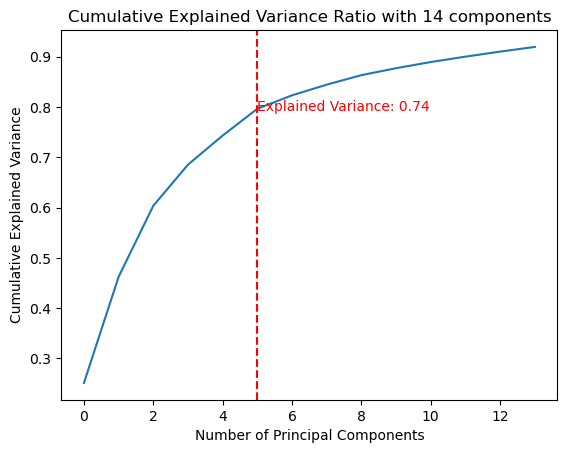

In [165]:
pcavarplot(dfn.iloc[:,1:-1], n_comp = 14, n_int = 5)

C:\Users\casti\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


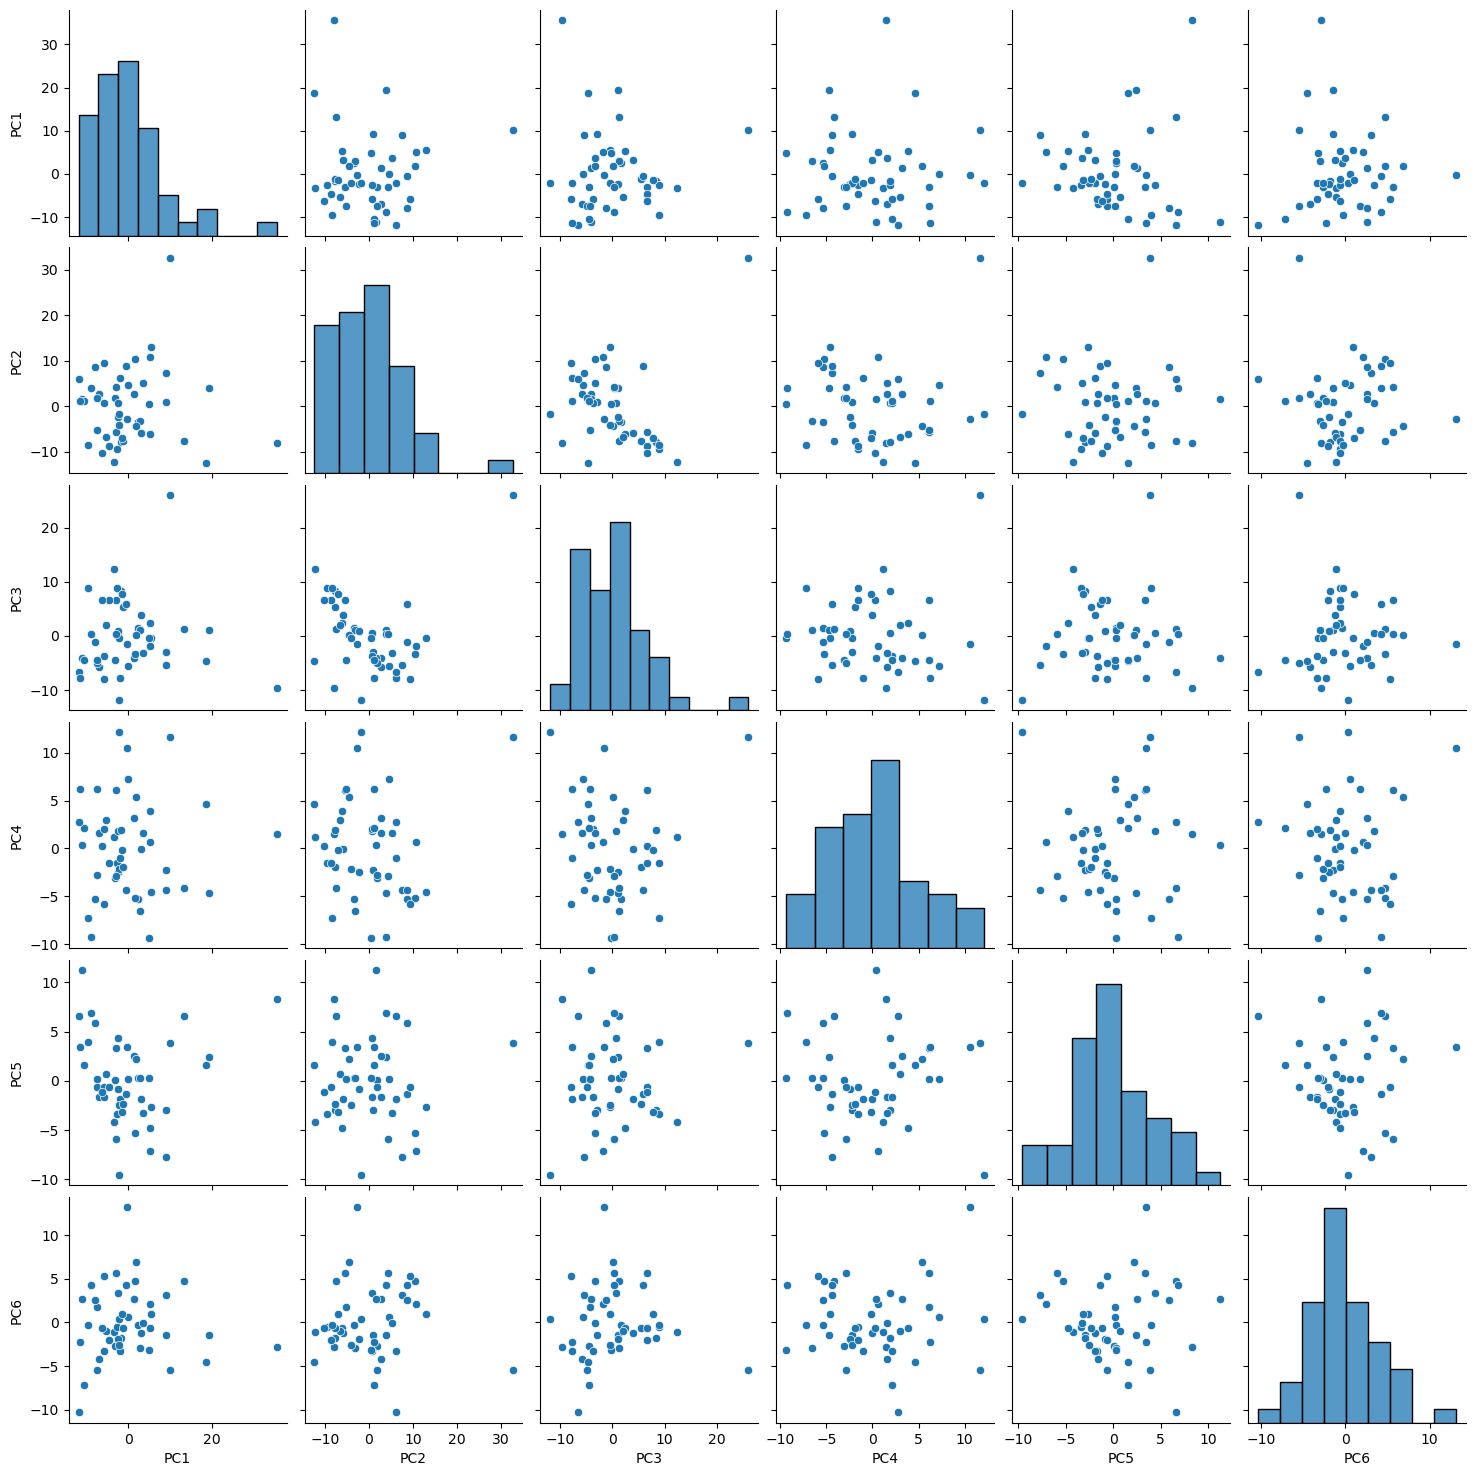

In [166]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dfn.iloc[:,1:-1])
n_comp = 6
pca = PCA(n_components = n_comp)
principal_components = pca.fit_transform(scaled_features)

transformed_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(6)])

sns.pairplot(transformed_df)

plt.show();

In [167]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dfn.iloc[:,1:-1])
n_comp = 6
pca = PCA(n_components = n_comp)
principal_components = pca.fit_transform(scaled_features)

loadings = pca.components_

# Create a DataFrame to store the loadings
loadings_df = pd.DataFrame(loadings, columns=dfn.iloc[:,1:-1].columns)

top_features = {}
for i, component in enumerate(loadings):
    top_features[f'PC{i+1}'] = loadings_df.abs().iloc[i].nlargest(5).index.tolist()

# Display the top features for each principal component
for pc, features in top_features.items():
    print('*' * 50)
    print(f'Principal Component {pc}: {features}')

**************************************************
Principal Component PC1: ['Occupied units paying rent [418]', 'Occupied units paying rent (excluding units where GRAPI cannot be computed) [414]', 'Women 15 to 50 years [189]', 'Female [338]', 'Female civilian employed population 16 years and over [285]']
**************************************************
Principal Component PC2: ["Female, bachelor's degree or higher [187]", 'Per capita income (dollars) [335]', "Bachelor's degree or higher [185]", 'Management, business, science, and arts occupations [274]', 'Median income (dollars) [329]']
**************************************************
Principal Component PC3: ['As a percent of all women with a birth in the past 12 months [192]', 'Female householder, no husband present, family [332]', 'Married-couple family [328]', 'Related children 5 to 17 years [364]', 'With own children under 18 years [131]']
**************************************************
Principal Component PC4: ['Median ag

In [168]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dfn.iloc[:,1:-1])
n_comp = 5
pca = PCA(n_components = n_comp)
principal_components = pca.fit_transform(scaled_features)
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=dfn.iloc[:,1:-1].columns)

top_features = {}
for i, component in enumerate(loadings):
    top_features[f'PC{i+1}'] = loadings_df.abs().iloc[i].nlargest(5).index.tolist()
    
ft_keep = []
for k,v in top_features.items():
    ft_keep.extend(v)
df_keep = dfn[ft_keep]
df_keep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 1942
Data columns (total 25 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Occupied units paying rent [418]                                                   49 non-null     int64  
 1   Occupied units paying rent (excluding units where GRAPI cannot be computed) [414]  49 non-null     int64  
 2   Women 15 to 50 years [189]                                                         49 non-null     int64  
 3   Female [338]                                                                       49 non-null     int64  
 4   Female civilian employed population 16 years and over [285]                        49 non-null     int64  
 5   Female, bachelor's degree or higher [187]                                          49 non-null     float64
 6  

<Axes: >

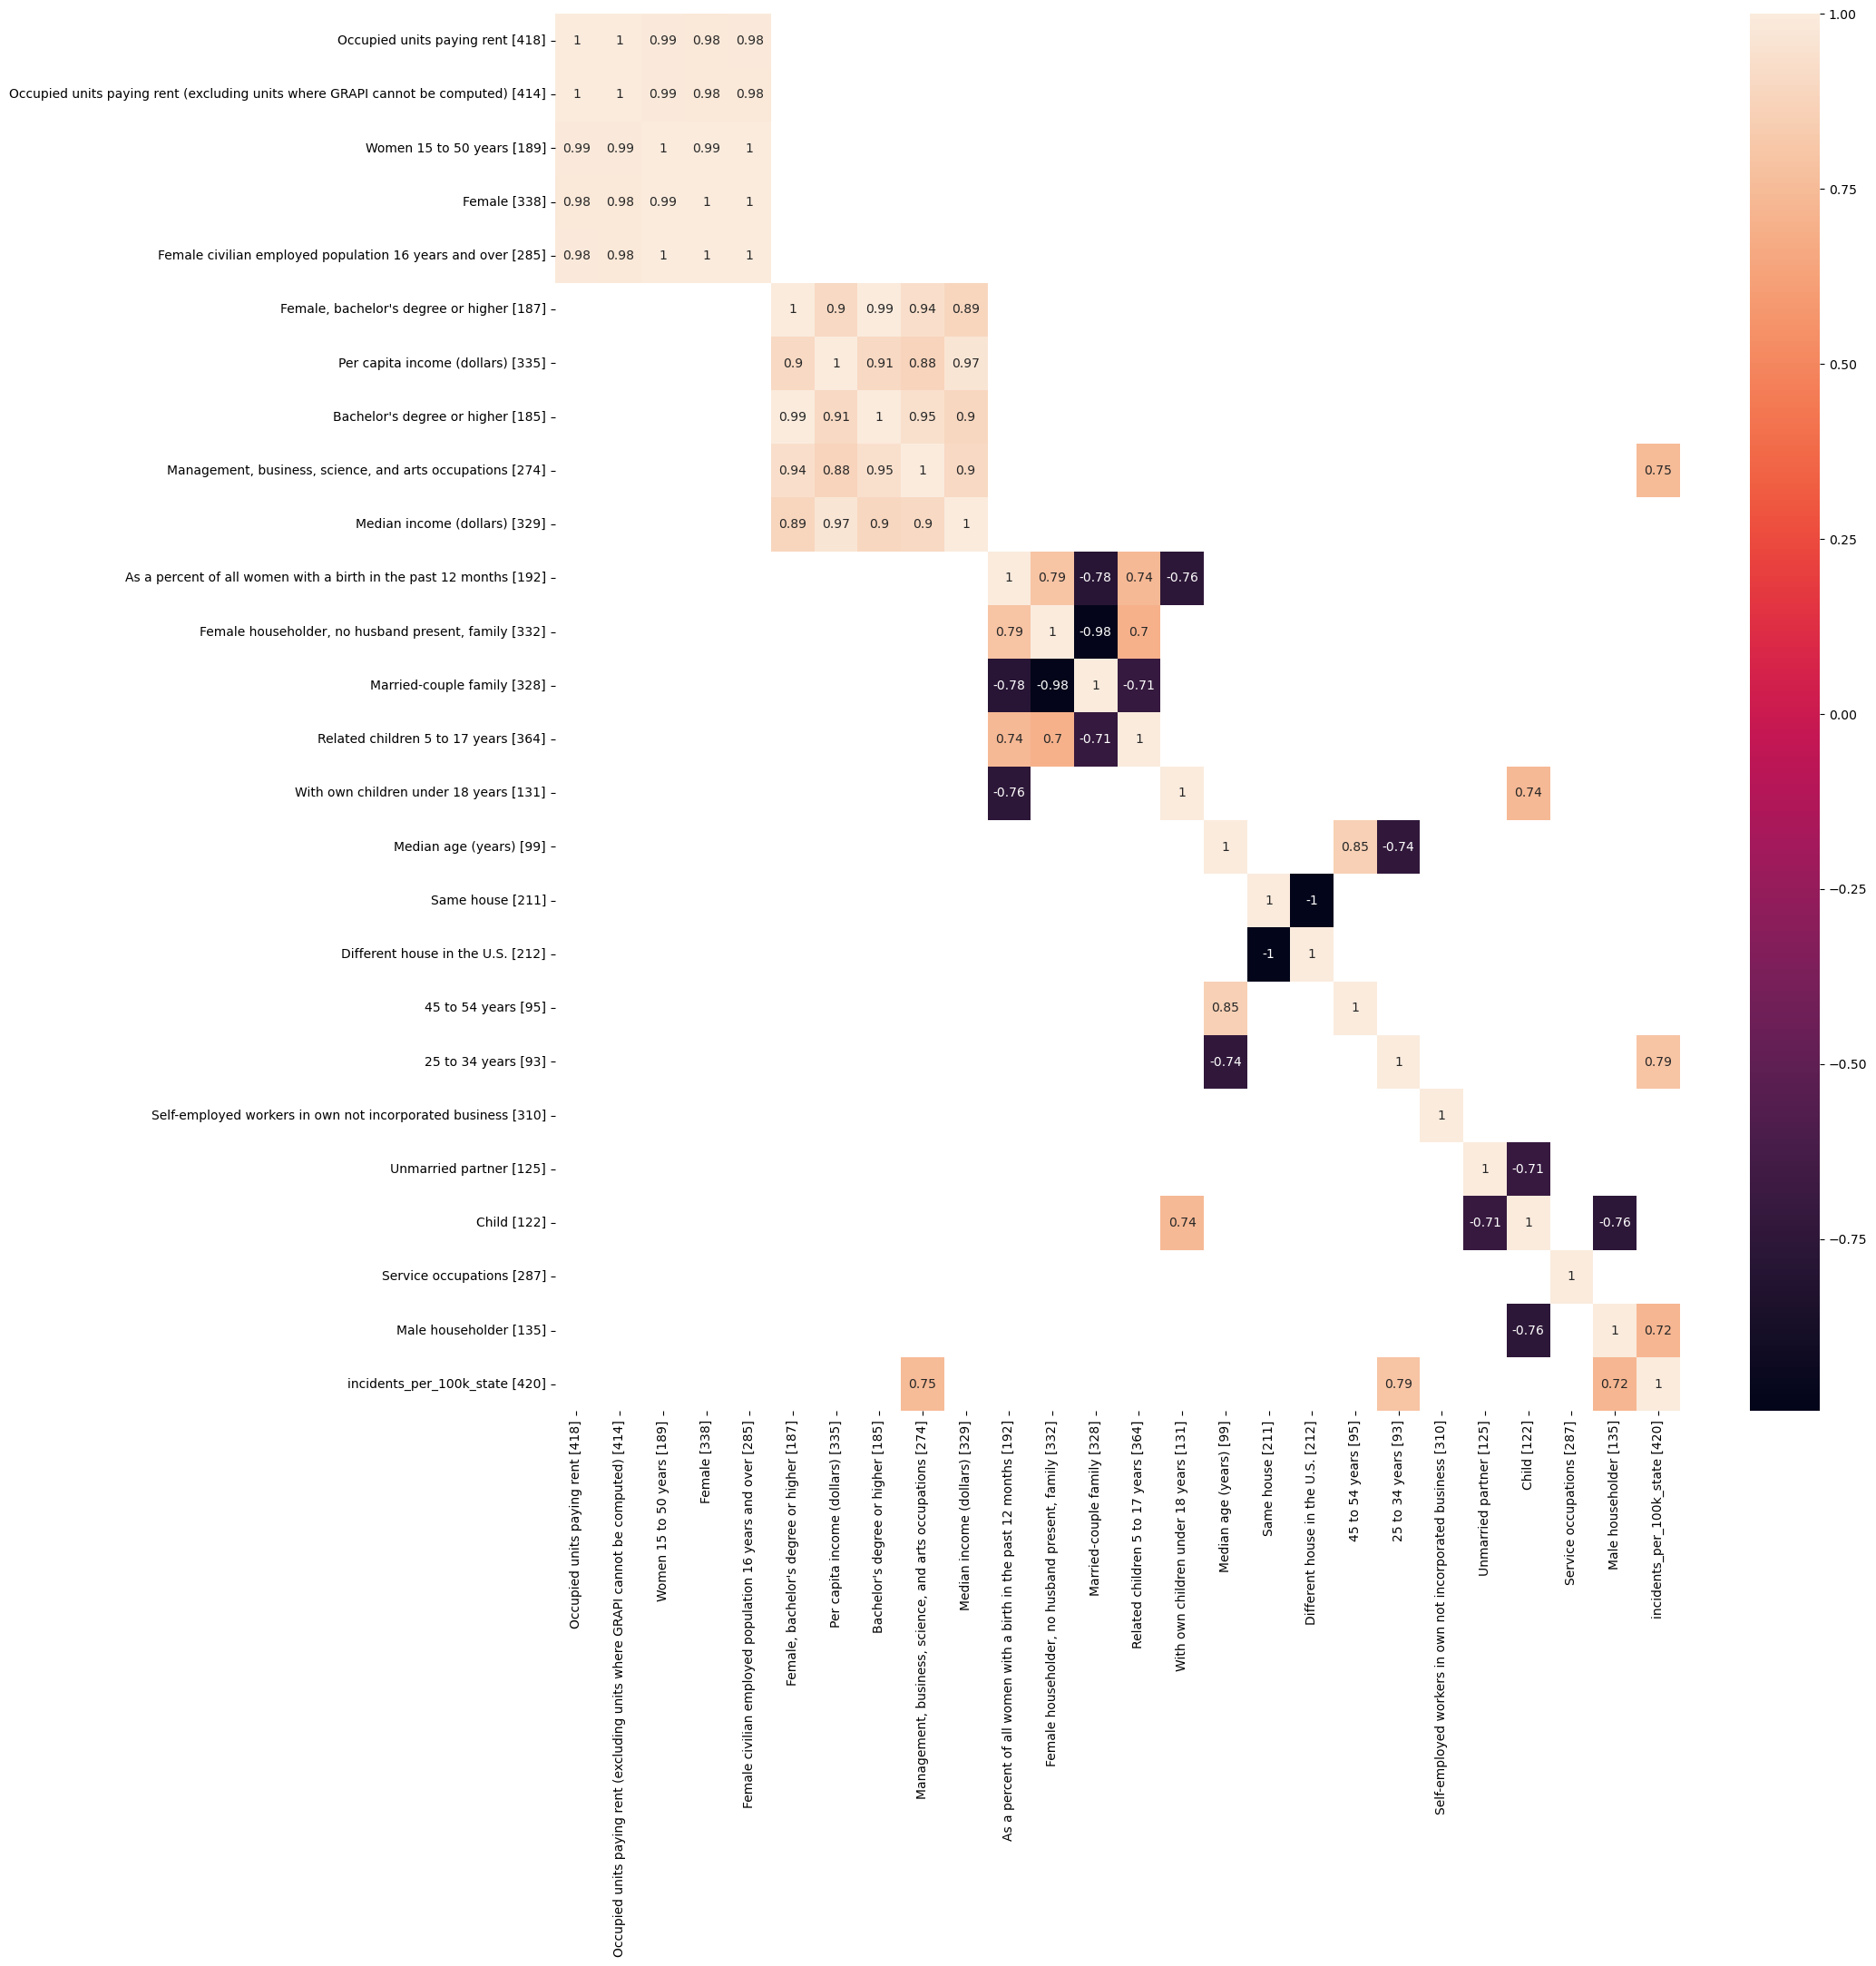

In [205]:
plt.subplots(figsize=(20,20))
mask = np.abs(df_keep.join(dfc['incidents_per_100k_state [420]']).corr()) <= 0.7
sns.heatmap(df_keep.join(dfc['incidents_per_100k_state [420]']).corr(), mask = mask, annot = True)

In [206]:
keep = np.abs(df_keep.join(dfc['incidents_per_100k_state [420]']).corr()) >= 0.7
c = list(keep.columns)
corrdf = dfc[c]
sns.pairplot(corrdf)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001788208CEA0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001788A129B20> (for post_execute):


KeyboardInterrupt: 

In [147]:
def plotbystate(df):
    
    num_values = len(df.columns)
    num_cols = min(num_values, 3)  
    num_rows = -(-num_values // num_cols)  
    
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    ax = ax.flatten()  
   
    for i, col in enumerate(df.columns):
        if pd.api.types.is_numeric_dtype(df[col]):
            xval = df.iloc[:,-1]
            yval = df[col]
            sns.scatterplot(x=xval, y=yval, ax=ax[i])
            ax[i].set_title(col) 
            
            pearson_corr = df[xval.name].corr(df[yval.name])
            
            if abs(pearson_corr) >= 0.25:  
                ax[i].set_facecolor('lightgreen')  
                ax[i].spines['top'].set_linewidth(2)  
                ax[i].spines['right'].set_linewidth(2)
                ax[i].spines['bottom'].set_linewidth(2)
                ax[i].spines['left'].set_linewidth(2)
            
            ax[i].set_title(f'{col} (Pearson Corr: {pearson_corr:.2f})') 
        
    for j in range(num_values, num_rows * num_cols):
        fig.delaxes(ax[j])
    
    plt.tight_layout()
    plt.show();

In [233]:
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

X = dfn.drop(columns = ['state [3]','incidents_per_100k_state [420]'])
y = dfc['incidents_per_100k_state [420]']
Xtr, Xte, ytr, yte = train_test_split(X,y, random_state = 10)

print(Xtr.shape, Xte.shape, ytr.shape, yte.shape)


(36, 304) (13, 304) (36,) (13,)


In [242]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(Xtr, ytr)
dumb_reg.constant_
ytepr = dumb_reg.predict(Xte)
print('r2:', r2_score(yte, ytepr))
print('MAE:', mean_absolute_error(yte, ytepr))

r2: -1.3638334115803672
MAE: 0.5890215741864826


In [231]:
lr = LinearRegression()
lr.fit(Xtr, ytr)
ypr = lr.predict(Xte)